In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('exchange_rate.csv')

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.shape

(7588, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
import datetime as dt
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [7]:
df['date']=df['date'].dt.date

In [8]:
df['date']

0       1990-01-01
1       1990-01-02
2       1990-01-03
3       1990-01-04
4       1990-01-05
           ...    
7583    2010-10-06
7584    2010-10-07
7585    2010-10-08
7586    2010-10-09
7587    2010-10-10
Name: date, Length: 7588, dtype: object

In [9]:
df.set_index(df['date'],inplace=True)
df.head()

,date,Ex_rate
date,,
1990-01-01,1990-01-01,0.7855
1990-01-02,1990-01-02,0.7818
1990-01-03,1990-01-03,0.7867
1990-01-04,1990-01-04,0.7860
1990-01-05,1990-01-05,0.7849


In [10]:
df.drop('date',axis=1,inplace=True)

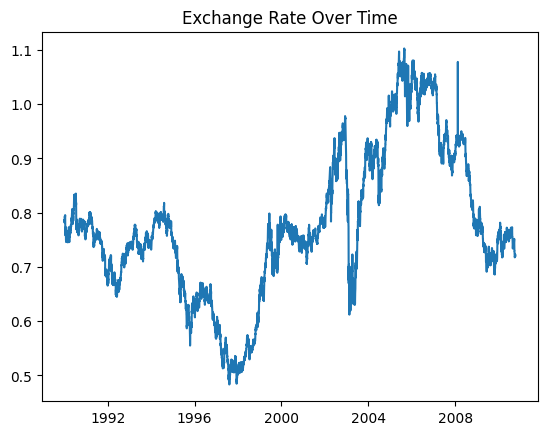

In [11]:
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(df['Ex_rate'])

In [13]:
adf_result

(-1.6649941807381414,
 0.4492327353597959,
 1,
 7586,
 {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 -55835.06254628545)

In [14]:
if adf_result[1]>=0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')

Data is Stationary


In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

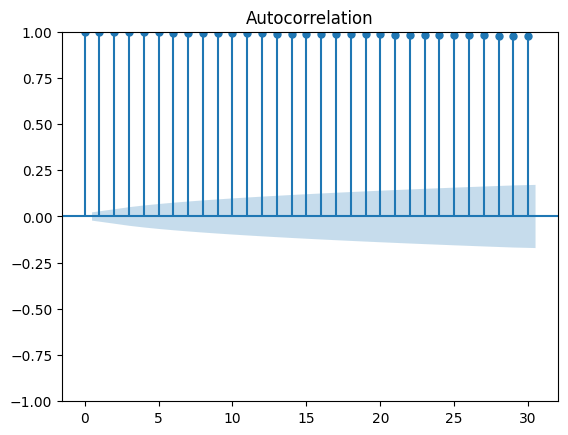

In [16]:
plot_acf(df['Ex_rate'],lags=30)
plt.show()

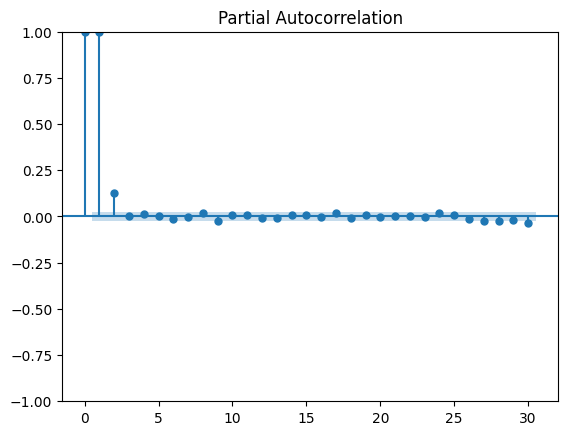

In [17]:
plot_pacf(df['Ex_rate'],lags=30)
plt.show()

In [18]:
from pmdarima import auto_arima

In [19]:
model=auto_arima(df['Ex_rate'],)

In [20]:
p,d,q=model.order

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
arima_model=ARIMA(df['Ex_rate'],order=model.order)

import warnings
warnings.filterwarnings('ignore')

C:\Users\ishan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ishan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ishan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
res=arima_model.fit()

In [24]:
res.forecast(steps=20)

2010-10-11    0.720825
2010-10-12    0.720825
2010-10-13    0.720825
2010-10-14    0.720825
2010-10-15    0.720825
2010-10-16    0.720825
2010-10-17    0.720825
2010-10-18    0.720825
2010-10-19    0.720825
2010-10-20    0.720825
2010-10-21    0.720825
2010-10-22    0.720825
2010-10-23    0.720825
2010-10-24    0.720825
2010-10-25    0.720825
2010-10-26    0.720825
2010-10-27    0.720825
2010-10-28    0.720825
2010-10-29    0.720825
2010-10-30    0.720825
Freq: D, Name: predicted_mean, dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
series=df['Ex_rate']
train,test=series[:-12],series[-12:]

In [27]:
forecast=res.forecast(steps=12)

In [28]:
mean_squared_error(test,forecast)

4.000604416666678e-06

In [29]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(test,forecast))

0.0020001510984589835